# Linear regression template

## Step 1 - Import librairies

In [24]:
# Data manipulation
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Matrice manipulation
import numpy as np

# Since the Scikit library is big, we only import what we need

# train_test_split : method to split the dataset (DataFrame) into two distinct : one for training, one for testing
from sklearn.model_selection import train_test_split

# SimpleImputer : class which allow us to fill missing values (null, NaN) with specific strategy (median, mean, mode, etc.)
from sklearn.impute import SimpleImputer

# StandardScaler : class which allow us to standardize (put on the same scale) numerical features (using z-score)
# OneHotEncoder : class which allow us to encode categorical features (create a column per category that contain only 0 and 1)
# LabelEncoder : class which allow us to encode labels (same as categorical, but with a "binary" template of data) 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

# ColumnTransformer : : class which allow us to use scalers and encoders ojects to transform our DataFrames, returning numpy arrays
from sklearn.compose import ColumnTransformer

# LinearRegression : class which allow us to perform a linear regression model on our data
from sklearn.linear_model import LinearRegression

## Step 2 - Import dataset 

In [25]:
df = pd.read_csv("/Users/qxzjy/vscworkspace/dse-ft-100/ml_module/data/Salary_Data.csv")
df.head()

,Country,YearsExperience,Salary
0,France,1.1,39343.0
1,United-Kingdom,1.3,46205.0
2,France,1.5,37731.0
3,France,2.0,43525.0
4,Germany,2.2,39891.0


Rows , Columuns : (30, 3)

       Country  YearsExperience         Salary
count       30        28.000000      30.000000
unique       3              NaN            NaN
top     France              NaN            NaN
freq        12              NaN            NaN
mean       NaN         5.428571   76003.000000
std        NaN         2.897618   27414.429785
min        NaN         1.100000   37731.000000
25%        NaN         3.200000   56720.750000
50%        NaN         5.000000   65237.000000
75%        NaN         7.975000  100544.750000
max        NaN        10.500000  122391.000000

Country            0
YearsExperience    2
Salary             0
dtype: int64


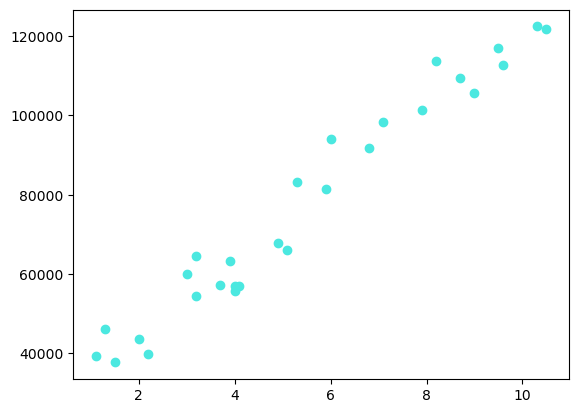

In [26]:
# Print the shape of dataset in the form of (#rows, #columns)
print(f"Rows , Columuns : {df.shape}")
print()

# Describe dataset's main statistics
# We're using the include="all" attribut because we want to see/explore all values (not only numbers)
# We need to see if there's missing values (null / NaN) and the type of data we have (numerical, categorical, labels, etc.)
print(df.describe(include="all"))
print()

# We print the sum of missing values by column
print(df.isnull().sum())


# sns.catplot(x="YearsExperience", y="Salary", data=df)
plt.scatter(df.iloc[:, 1], df.iloc[:, 2], color="#4BE8E0")
plt.show()

## Step 3 - Separate Target from feature variables

In [ ]:
print("Separating labels from features...")

# We create two separate DataFrames, one with our features X and one for the target variable Y (that we want to predict)
# We're using a List to enumerate the columns that we're going to use as features X
features_list = ["Country", "YearsExperience"]
X = df.loc[:,features_list] # X = df[features_list]
y = df.loc[:,"Salary"] # Y = df["Salary"]

print("...Done.")
print()

print(X.head())
print()
print(y.head())

Separating labels from features...
...Done.

          Country  YearsExperience
0          France              1.1
1  United-Kingdom              1.3
2          France              1.5
3          France              2.0
4         Germany              2.2

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64


## Step 4 - Train / Test split 

In [ ]:
print("Splitting dataset into train set and test set...")

# The method will return 4 arrays : 2 with features X and 2 with target variables y (each time : 1 for training the model, 1 for testing it)
# X : our DataFrames of features
# y : our DataFrames of target variables
# test_size : the size of the training set compared with total set, using proportion => 0.20 (20%)
# random_state : the method we use to randomly selected our data
# stratify : allows to stratify your sample (same proportion of categories in test and train set) on a specific column (ex: stratify=X["Country"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("...Done.")  
print()
print(X_train.head())
print()                    
print(y_train.head())                    
print()                    

print(X_test.head())
print()                    
print(y_test.head())

Splitting dataset into train set and test set...
...Done.

           Country  YearsExperience
27  United-Kingdom              9.6
11  United-Kingdom              4.0
17  United-Kingdom              5.3
22          France              7.9
5   United-Kingdom              NaN

27    112635.0
11     55794.0
17     83088.0
22    101302.0
5      56642.0
Name: Salary, dtype: float64

           Country  YearsExperience
2           France              1.5
28          France             10.3
13          France              4.1
10  United-Kingdom              3.9
26  United-Kingdom              9.5

2      37731.0
28    122391.0
13     57081.0
10     63218.0
26    116969.0
Name: Salary, dtype: float64


## Step 5 - Training

In [29]:
print("--- Training pipeline ---")

--- Training pipeline ---


### Imputing missing values

In [30]:
print("Imputing missing values...")
print()

# Instanciate class of SimpleImputer with strategy of median
imputer = SimpleImputer(strategy="median")

# Copy dataset to avoid caveats of assign a copy of a slice of a DataFrame
X_train = X_train.copy()
print(X_train.head(10))
print()

# Fit and transform columns where there are missing values
# Alternative : X_train.loc[:,["YearsExperience"]] = imputer.fit_transform(X_train.loc[:,["YearsExperience"]])
X_train.iloc[:,[1]] = imputer.fit_transform(X_train.iloc[:,[1]])

print("...Done!")
print()

print(X_train.head(10))

Imputing missing values...

           Country  YearsExperience
27  United-Kingdom              9.6
11  United-Kingdom              4.0
17  United-Kingdom              5.3
22          France              7.9
5   United-Kingdom              NaN
16  United-Kingdom              5.1
8          Germany              3.2
14          France              NaN
23          France              8.2
20  United-Kingdom              6.8

...Done!

           Country  YearsExperience
27  United-Kingdom              9.6
11  United-Kingdom              4.0
17  United-Kingdom              5.3
22          France              7.9
5   United-Kingdom              5.0
16  United-Kingdom              5.1
8          Germany              3.2
14          France              5.0
23          France              8.2
20  United-Kingdom              6.8


### Standardizing (scaling) and encoding

In [ ]:
print("Encoding categorical features and standardizing numerical features...")
print()

# We create a list with ids of columns containing numerical features in order to standardize them 
numeric_features = [1]
numeric_transformer = StandardScaler()

# We create a list with ids of columns containing categorical features in order to encode them 
# We can add a drop='first' attribute to the class, in order to avoid colinearity
# If using drop='first', we have to aggregate coefficient from the categorical features
categorical_features = [0]
categorical_transformer = OneHotEncoder()

# Instansiate the class ColumnTransformer with our transformers (in this case : one for scaling, one for encoding)
featureencoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),    
        ('num', numeric_transformer, numeric_features)
    ]
)

X_train = featureencoder.fit_transform(X_train)
print("...Done.")
print()
print(X_train) # print first 5 rows (not using iloc since now X_train became a numpy array)
print()

Encoding categorical features and standardizing numerical features...

...Done.

[[ 0.          1.          1.74520997]
 [ 0.          1.         -0.45926578]
 [ 0.          1.          0.05248752]
 [ 0.          0.          1.07599411]
 [ 0.          1.         -0.0656094 ]
 [ 0.          1.         -0.02624376]
 [ 1.          0.         -0.77419089]
 [ 0.          0.         -0.0656094 ]
 [ 0.          0.          1.19409103]
 [ 0.          1.          0.64297209]
 [ 0.          1.         -1.52213802]
 [ 0.          0.          2.09950071]
 [ 0.          1.         -0.85292216]
 [ 1.          0.         -1.16784727]
 [ 0.          0.          0.28868135]
 [ 0.          1.          0.32804699]
 [ 1.          0.         -0.5773627 ]
 [ 1.          0.         -0.77419089]
 [ 1.          0.          1.50901614]
 [ 0.          0.         -1.24657855]
 [ 0.          0.         -1.60086929]
 [ 0.          1.          0.76106901]
 [ 1.          0.         -0.10497504]
 [ 0.          0.     

### Build and train the model

In [32]:
# Train model
print("Train model...")

regressor = LinearRegression()

# This steps is the actual training !
regressor.fit(X_train, y_train)

print("...Done.")

Train model...
...Done.


### Predict

In [33]:
# Predictions on training set
print("Predictions on training set...")

y_train_pred = regressor.predict(X_train)

print("...Done.")
print(y_train_pred[:5]) # print first 5 rows (not using iloc since now y_train became a numpy array)
print()

Predictions on training set...
...Done.
[116253.11779622  64173.48703481  76263.40131871  99032.97170005
  73473.42109935]



## Step 6 - Testing

In [34]:
print("--- Test pipeline ---")

--- Test pipeline ---


### Imputing missing values

In [35]:
print("Imputing missing values...")
print(X_test)
print()

# Fit and transform columns where there are missing values
# Alternative : X_train.loc[:,["YearsExperience"]] = imputer.fit_transform(X_train.loc[:,["YearsExperience"]])
X_test.iloc[:,[1]] = imputer.transform(X_test.iloc[:,[1]])

print("...Done!")
print()
print(X_test)

Imputing missing values...
           Country  YearsExperience
2           France              1.5
28          France             10.3
13          France              4.1
10  United-Kingdom              3.9
26  United-Kingdom              9.5
24          France              8.7

...Done!

           Country  YearsExperience
2           France              1.5
28          France             10.3
13          France              4.1
10  United-Kingdom              3.9
26  United-Kingdom              9.5
24          France              8.7


### Standardizing (scaling) and encoding

In [36]:
print("Encoding categorical features and standardizing numerical features...")
print()
print(X_test)
print()

X_test = featureencoder.transform(X_test)
print("...Done.")
print()
print(X_test)

Encoding categorical features and standardizing numerical features...

           Country  YearsExperience
2           France              1.5
28          France             10.3
13          France              4.1
10  United-Kingdom              3.9
26  United-Kingdom              9.5
24          France              8.7

...Done.

[[ 0.          0.         -1.44340674]
 [ 0.          0.          2.02076943]
 [ 0.          0.         -0.41990014]
 [ 0.          1.         -0.49863142]
 [ 0.          1.          1.70584433]
 [ 0.          0.          1.39091922]]


### Predict

In [37]:
# Predictions on test set
print("Predictions on test set...")

y_test_pred = regressor.predict(X_test)

print("...Done.")
print(y_test_pred[:5])
print()

Predictions on test set...
...Done.
[ 39513.39368701 121352.81345494  63693.22225481  63243.49362836
 115323.12438977]



## Step 7 - Evaluate your model

In [ ]:
# Performance assessment
print("--- Assessing the performances of the model ---")

# Print R^2 scores
print("R2 score on training set : ", regressor.score(X_train, y_train))
print("R2 score on test set : ", regressor.score(X_test, y_test))

# R2 close to 1 => good performance
# R2 train +/- 5% R2 test => good performance
# If more :
# R2 train > R2 test => overfitting, impossible to generalize, need more data
# R2 train < R2 test => underfitting, not really a problem, maybe use a complex model
if(regressor.score(X_train, y_train) > regressor.score(X_test, y_test)) :
    print("R2 train > R2 test => overfitting")
else :
    print("R2 train < R2 test => underfitting")

--- Assessing the performances of the model ---
R2 score on training set :  0.9201048506926818
R2 score on test set :  0.9908610238389275
R2 train < R2 test => underfitting


## Step 9 - Feature importance

In [39]:
print("coefficients are: ", regressor.coef_) 
print("Constant is: ", regressor.intercept_)

coefficients are:  [-1258.20467202  1410.25818646 23624.49705292]
Constant is:  73613.15192364734


In [40]:
X_train[:5] # Visualize the first 5 rows of your X_train

array([[ 0.        ,  1.        ,  1.74520997],
       [ 0.        ,  1.        , -0.45926578],
       [ 0.        ,  1.        ,  0.05248752],
       [ 0.        ,  0.        ,  1.07599411],
       [ 0.        ,  1.        , -0.0656094 ]])

In [41]:
# Access transformers from feature_encoder
print("All transformers are: ", featureencoder.transformers_)

# Access one specific transformer
print("One Hot Encoder transformer is: ", featureencoder.transformers_[0][1])

All transformers are:  [('cat', OneHotEncoder(drop='first'), [0]), ('num', StandardScaler(), [1])]
One Hot Encoder transformer is:  OneHotEncoder(drop='first')


In [42]:
# Print categories
categorical_column_names = featureencoder.transformers_[0][1].categories_
print("Categorical columns are: ", categorical_column_names)

Categorical columns are:  [array(['France', 'Germany', 'United-Kingdom'], dtype=object)]


In [43]:
numerical_column_names = X.iloc[:, numeric_features].columns # using the .columns attribute gives us the name of the column 
print("numerical columns are: ", numerical_column_names)

numerical columns are:  Index(['YearsExperience'], dtype='object')


In [44]:
# Append all columns 
all_column_names = np.append(categorical_column_names, numerical_column_names)
all_column_names

array(['France', 'Germany', 'United-Kingdom', 'YearsExperience'],
      dtype=object)

In [45]:
# Feature importance 
feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients":regressor.coef_
})

feature_importance

ValueError: All arrays must be of the same length

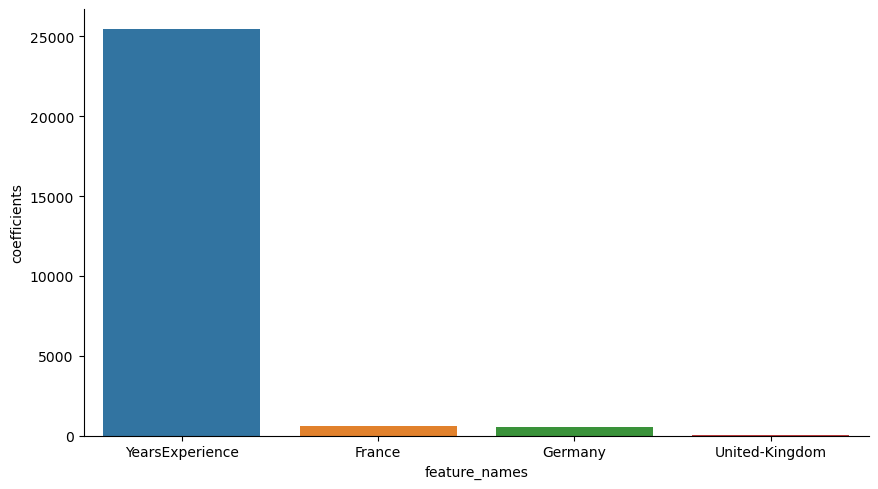

In [ ]:
# Set coefficient to absolute values to rank features
feature_importance["coefficients"] = feature_importance["coefficients"].abs()

# Visualize ranked features using seaborn
sns.catplot(x="feature_names", 
            y="coefficients", 
            data=feature_importance.sort_values(by="coefficients", ascending=False), 
            kind="bar",
            aspect=16/9, # Resize graph
            hue='feature_names')